In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data= pd.read_csv('Desktop/Stock.csv')
data.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2/7/2023,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2/8/2023,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2/9/2023,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2/10/2023,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2/13/2023,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [3]:
data.dropna(inplace=True)

In [4]:
sliced_x = data.iloc[:,0:3].join(data.iloc[:,3:7])
sliced_x.head()

,Ticker,Date,Open,High,Low,Close,Adj Close
0,AAPL,2/7/2023,150.639999,155.229996,150.639999,154.649994,154.414230
1,AAPL,2/8/2023,153.880005,154.580002,151.169998,151.919998,151.688400
2,AAPL,2/9/2023,153.779999,154.330002,150.419998,150.869995,150.639999
3,AAPL,2/10/2023,149.460007,151.339996,149.220001,151.009995,151.009995
4,AAPL,2/13/2023,150.949997,154.259995,150.919998,153.850006,153.850006


<Axes: xlabel='Open', ylabel='Close'>

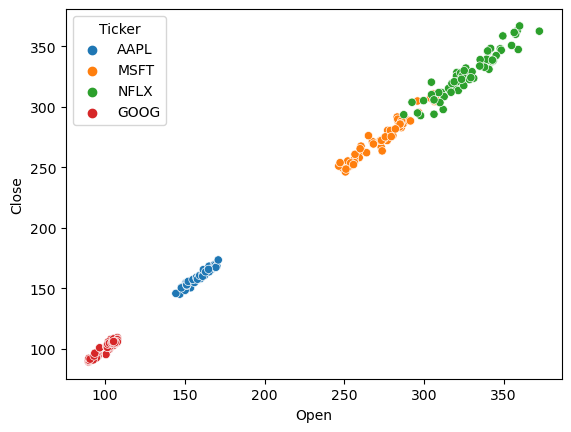

In [5]:
sns.scatterplot(x=data['Open'],y=data['Close'], hue=data['Ticker'])
# 'hue' parameter is used to color-code the points based on the 'Ticker' column

In [6]:
sliced_y = data.iloc[:,7:8]
sliced_y.head()

,Volume
0,83322600
1,64120100
2,56007100
3,57450700
4,62199000


In [7]:
from sklearn.preprocessing import LabelEncoder
toBeEncode = ['Ticker','Date','Open','High','Low','Close','Adj Close']
encoder = LabelEncoder()
for col in toBeEncode:
    sliced_x[col]= encoder.fit_transform(sliced_x[col])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(sliced_x, sliced_y, test_size=0.2)
#test_size=portion of data allocated to test is 20%

In [11]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


C:\Users\Net\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
result=clf.predict(X_test)
print(result)

[55469600 21864200 65573800 56976200 41949600 22491100 54499500 17944500
 25395200 27276600 38235200 17944500 12991700 61707600 36610900 83322600
 64120100 17641400  6142600 26148300 20987900 22064800  5064100  5350500
 17116300 22724300 22360800  6489400 21294100 20926300 48394200 22491100
  3879700 42375100 73641400 76140300  5956700 52456400 49501700 83322600
  4546200 17150300 31385800 34873300 52456400  4553100 19741500  5956700
 24808200 21864200]


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(result,y_test)

0.0

In [19]:
from sklearn.metrics import precision_score
precision_score(result,y_test,average='weighted')

C:\Users\Net\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [21]:
from sklearn.metrics import recall_score
recall_score(result,y_test,average='weighted')

C:\Users\Net\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [22]:
from sklearn.metrics import f1_score
f1_score(result,y_test,average='weighted')

0.0